In [1]:
import networkx as nx
import matplotlib.pyplot as plt

#### Construct a connected random graph

In [2]:
from Evaluation import GraphConstructionAlgorithms as gca

gg = gca.GraphGenerator()
G = gg.construct_connected_er(8, 0.5)

#### Construct a triangulation using the elimination game algorithm:

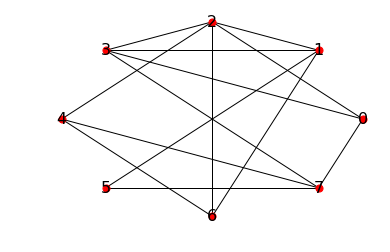

In [3]:
from TriangulationAlgorithms import EG

aeg = EG.Algorithm_EliminationGame(G.copy())
# draw the initial graph:
aeg.draw_triangulation()

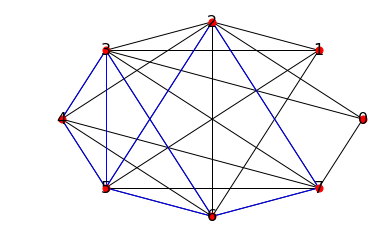

Size of this triangulation: 8


In [4]:
aeg.run()
# draw the triangulated graph. The original edges are black, new edges are blue.
aeg.draw_triangulation()
print ("Size of this triangulation: "+str(len(aeg.edges_of_triangulation)))

#### Construct a triangulation using a randomized elimination game algorithm:

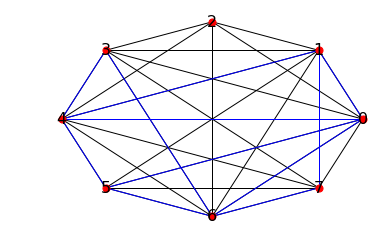

Size of this triangulation: 11


In [5]:
aeg = EG.Algorithm_EliminationGame(G.copy())
aeg.run_randomized()
# draw the triangulated graph. The original edges are black, new edges are blue.
aeg.draw_triangulation()
print ("Size of this triangulation: "+str(len(aeg.edges_of_triangulation)))

#### Construct a triangulation using the saturate minimal separators algorithm:

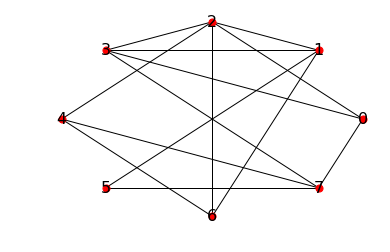

In [6]:
from TriangulationAlgorithms import SMS

sms = SMS.Algorithm_SMS(G.copy())
# draw the initial graph:
sms.draw_triangulation()

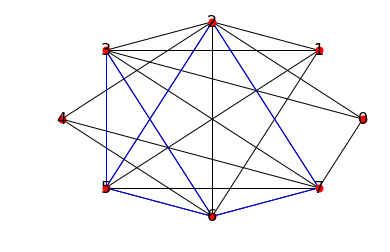

Size of this triangulation: 6


In [7]:
sms.run()
# draw the triangulated graph. The original edges are black, new edges are blue.
sms.draw_triangulation()
print ("Size of this triangulation: "+str(len(sms.edges_of_triangulation)))

#### Construct a triangulation using a randomized saturate minimal separators algorithm:

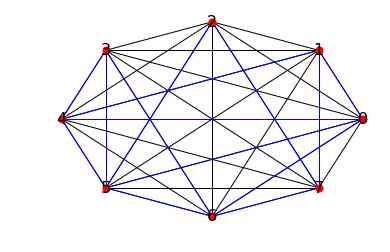

Size of this triangulation: 14


In [8]:
sms = SMS.Algorithm_SMS(G.copy())
sms.run_randomized()
# draw the triangulated graph. The original edges are black, new edges are blue.
sms.draw_triangulation()
print ("Size of this triangulation: "+str(len(sms.edges_of_triangulation)))

#### Construct a triangulation using the algorithm LEX-M:

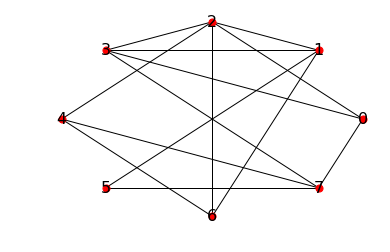

In [9]:
from TriangulationAlgorithms import LEX_M

alex = LEX_M.Algorithm_LexM(G.copy())
# draw the initial graph:
alex.draw_triangulation()

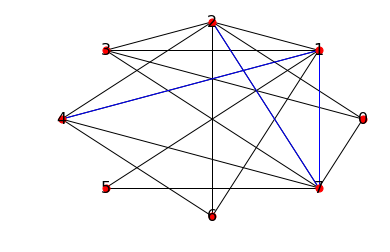

Size of this triangulation: 3


In [10]:
alex.run()
# draw the triangulated graph. The original edges are black, new edges are blue.
alex.draw_triangulation()
print ("Size of this triangulation: "+str(len(alex.edges_of_triangulation)))

#### Construct a triangulation using a randomized LEX-M:

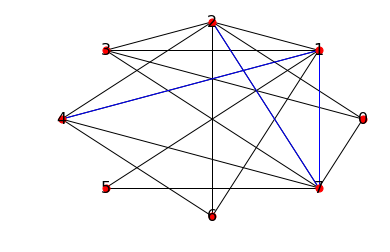

Size of this triangulation: 3


In [11]:
alex = LEX_M.Algorithm_LexM(G.copy())
alex.run_randomized()
# draw the triangulated graph. The original edges are black, new edges are blue.
alex.draw_triangulation()
print ("Size of this triangulation: "+str(len(alex.edges_of_triangulation)))

#### Construct a minimum triangulation by full search:

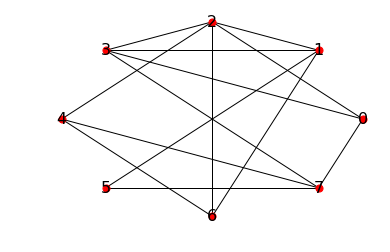

In [12]:
from TriangulationAlgorithms import MT

amt = MT.Algorithm_MinimumTriangulation(G.copy())
# draw the initial graph:
amt.draw_triangulation()

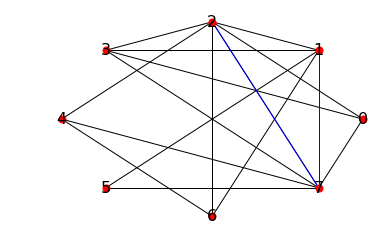

Size of this triangulation: 2


In [13]:
amt.run()
# draw the triangulated graph. The original edges are black, new edges are blue.
amt.draw_triangulation()
print ("Size of this triangulation: "+str(len(amt.edges_of_triangulation)))